In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('C:/Users/ramya/Documents/Asterisc Intern/Data Science Intern Projects/Titanic Survival Prediction/TASK01-20230905T101458Z-001/TASK01/train.csv')
testset = pd.read_csv('C:/Users/ramya/Documents/Asterisc Intern/Data Science Intern Projects/Titanic Survival Prediction/TASK01-20230905T101458Z-001/TASK01/test.csv')

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df = df.drop(columns="Cabin",axis=1)

In [8]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [9]:
df['Embarked'].mode()[0]

'S'

In [10]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace = True)

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
df = df.drop(columns="Name",axis=1)

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

C:\Users\ramya\AppData\Local\Temp\ipykernel_8160\3383022798.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


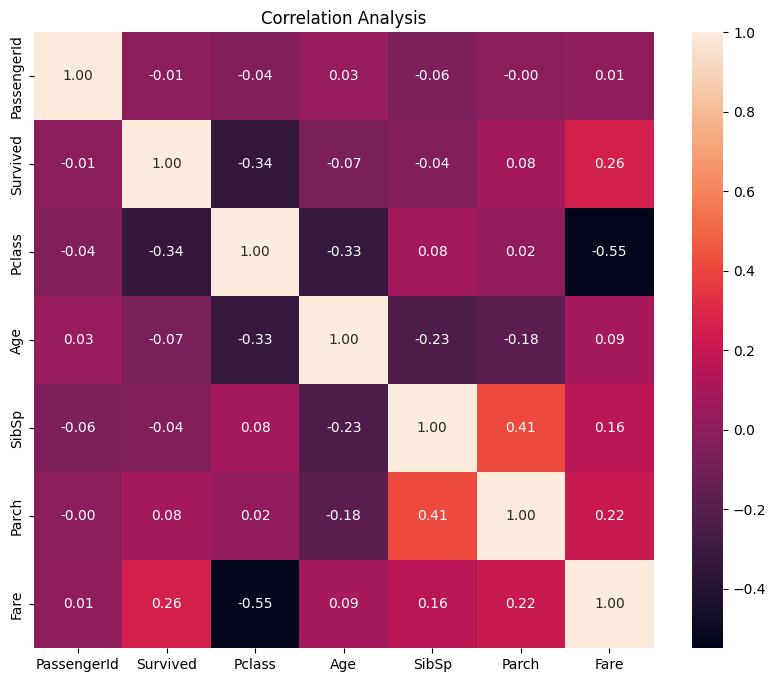

In [15]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Analysis")
plt.show()

In [16]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [17]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [19]:
df = df.drop(columns=['PassengerId','Ticket','SibSp','Parch'],axis=1)

In [20]:
df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,22.000000,7.2500,0
1,1,1,1,38.000000,71.2833,1
2,1,3,1,26.000000,7.9250,0
3,1,1,1,35.000000,53.1000,0
4,0,3,0,35.000000,8.0500,0
5,0,3,0,29.699118,8.4583,2
6,0,1,0,54.000000,51.8625,0
7,0,3,0,2.000000,21.0750,0
8,1,3,1,27.000000,11.1333,0
9,1,2,1,14.000000,30.0708,1


In [21]:
x = df.drop(columns = 'Survived',axis = 1)
y = df['Survived']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
x_train.shape

(712, 5)

In [24]:
x_test.shape

(179, 5)

In [25]:
logreg = LogisticRegression()

In [26]:
logreg.fit(x_train, y_train)

LogisticRegression()

In [27]:
x_test_pred = logreg.predict(x_test)

In [28]:
accuracy2 = accuracy_score(y_test, x_test_pred)
print(f"Model Accuracy of Test data: {accuracy2:.3f}")

Model Accuracy of Test data: 0.793


In [29]:
test_set = testset.drop(columns=['Cabin','Name','PassengerId','Ticket','SibSp','Parch'], axis=1)
test_set.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)
test_set['Age'].fillna(test_set['Age'].mean(),inplace=True)
test_set['Fare'].fillna(test_set['Fare'].mean(),inplace=True)
test_set.shape

(418, 5)

In [30]:
test_set.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

In [31]:
test_pred = logreg.predict(test_set)

In [32]:
testset['Survived'] = test_pred

In [33]:
testset['Survived'].value_counts()

0    260
1    158
Name: Survived, dtype: int64

In [34]:
savepath = "C:/Users/ramya/Documents/Asterisc Intern/Data Science Intern Projects/Titanic Survival Prediction/"
testset.to_csv(savepath+"Titanic_Survival_Prediction_Result.csv")